## ВШЭ, ФКН, Программа "Специалист по Data Science" (2021/2022)
## Курс "Машинное обучение"
## ДЗ №6: Применение методов KMeans и и DBSCAN
## Выполнил: Кирилл Н., ibnkir@yandex.ru, 21.03.2022 г.
***

## О задании

Часть 1 содержит практическое задание на применение методов KMeans и DBSCAN.

Часть 2 содержит практическое задание на реализацию метода KMeans.

Часть 3 содержит практическое задание на снижение размерности с помощью PCA и кластеризацию табличных данных.


## Оценивание и штрафы


#### 1. k-means and DBSCAN на картинках [4 балла]
* [Задание 1](#task1) [2 балла]
* [Задание 2](#task2) [1 балл]
* [Задание 3](#task3) [1 балл]

#### 2. k-means своими руками [4 балла]
* [Задание 1](#task2_1) [1 балл]
* [Задание 2](#task2_2) [3 балла]

#### 3. PCA + кластеризация [6 баллов]
* [Задание 1](#task3_1) [1 балл]
* [Задание 2](#task3_2) [1 балл]
* [Задание 3](#task3_3) [1 балл]
* [Задание 4](#task3_4) [1 балл]
* [Задание 5](#task3_5) [2 балла]

Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{14},$$ где $s$ - сумма набранных балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (8, 5)
%matplotlib inline

# Часть 1. Кластеризация цифр.

В этом задании вам нужно будет кластеризовать изображения цифр. В данном случае одна картинка - это один объект (признаков столько, сколько на картинке пикселей).

In [26]:
from sklearn.datasets import load_digits

In [27]:
digits = load_digits()

In [28]:
digits = digits["data"]

Число объектов и признаков:

In [29]:
digits.shape

(1797, 64)

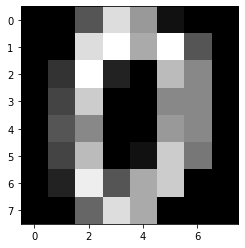

In [30]:
# Каждый объект - изображение цифры размеров 8 x 8
plt.imshow(digits[0].reshape(8, 8), cmap="gray")
plt.show()

In [31]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### Задание 1 [2 балла] <a id="task1"></a>

Кластеризуйте цифры методами кластеризации k-means ([`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) и DBSCAN ([`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)). Измерьте качество кластеризации с помощью метрики Silhouette Coefficient ([`sklearn.metrics.silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)).

In [32]:
# your code here
X = digits
k_means = KMeans(n_clusters = 10)
k_means.fit(X)
clusters = k_means.predict(X)
print('Silhouette score:', silhouette_score(X, clusters))

Silhouette score: 0.18221315353882525


In [112]:
samples = 5
e = 0.5
dbscan = DBSCAN(eps=e, min_samples=samples)
dbscan.fit(X)
clasters = dbscan.labels_
print(clasters)
#print('Silhouette score:', silhouette_score(X, clusters))

[-1 -1 -1 ... -1 -1 -1]


In [104]:
print(clusters)

[0 0 0 ... 0 0 0]


### Задание 2 [1 балл] <a id="task2"></a>

Для кластеризации методом k-means визуализируйте картинки - центры кластеров (метод `.cluster_centers_` у KMeans).

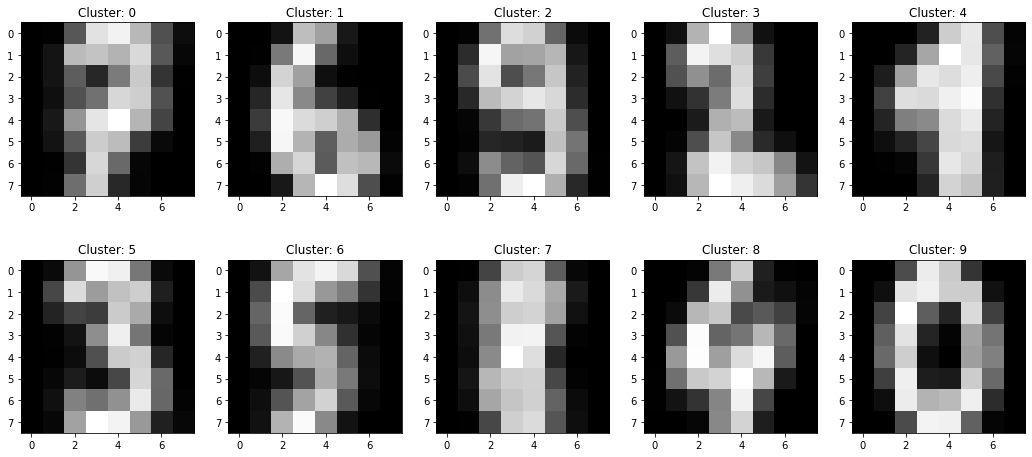

In [89]:
# your code here

plt.figure(figsize=(18, 8))
rows, cols = 2, 5

for i in range(10):
    plt.subplot(rows, cols, i + 1)
    plt.title(f"Cluster: {i}")
    plt.imshow(k_means.cluster_centers_[i].reshape(8, 8), cmap="gray")

In [ ]:
plt.figure(figsize=(12, 6))
rows, cols = 10, 3

for i in range(30):
    plt.subplot(rows, cols, i + 1)
    plt.title(f"Cluster: {i}")
    plt.imshow(k_means.cluster_centers_[i].reshape(8, 8), cmap="gray")

### Задание 3 [1 балл] <a id="task3"></a>

Для кластеризации методом DBSCAN выведите три случайно выбранные картинки из каждого кластера.

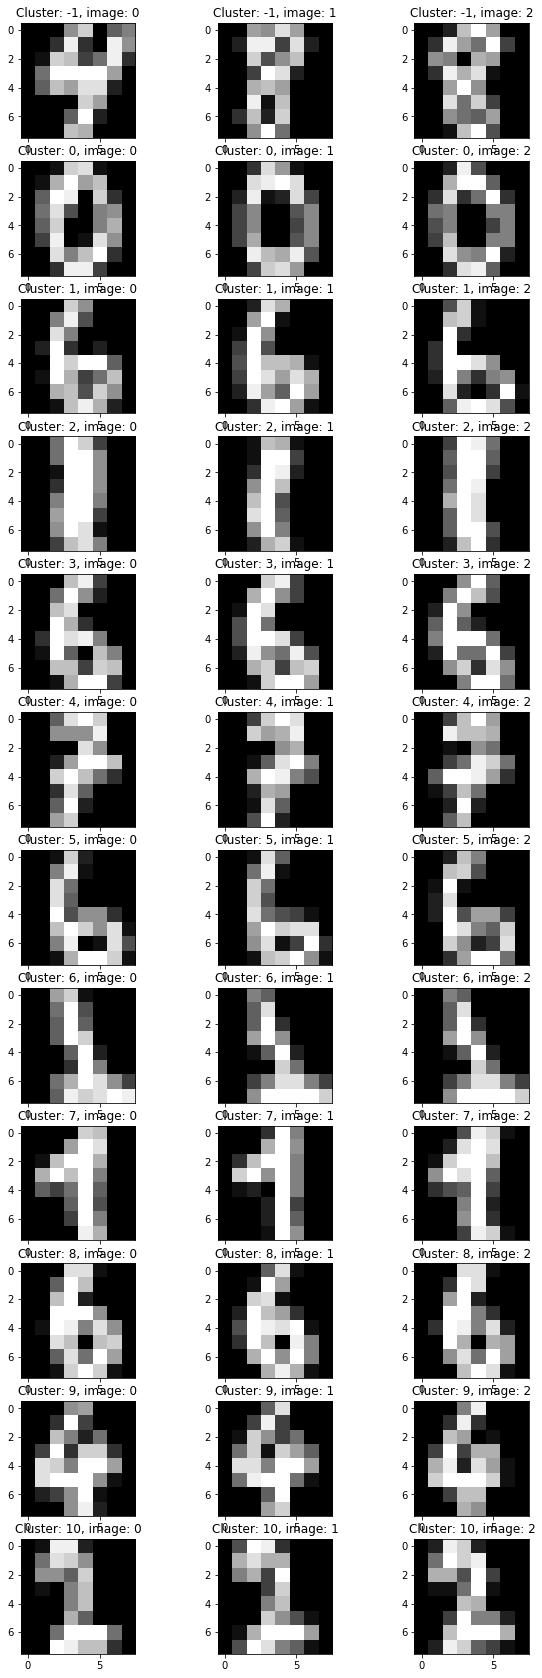

In [22]:
# your code here

# Часть 2. K-means своими руками

В этом задании вам нужно будет реализовать алгоритм K-Means. Для этого потребуется:

- следовать инструкциям
- воспользоваться базовыми техниками `numpy`
- понимание, что происходит в алгоритме K-Means

Сгенерируем случайную выборку. Матрица объекты-признаки находится в переменной $X$.

In [8]:
np.random.seed(13)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))

Визуализируем выборку:

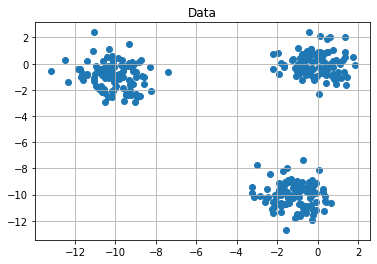

In [12]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.grid();

### Задание 1 [1 балл] <a id="task2_1"></a>

Чтобы реализовать алгоритм K-Means, нам понадобится вспомогательная функция. В процессе работы алгоритма мы все время обновляем значение целевой переменной для каждого объекта - то есть на каждом шаге вычисляем, к какому кластеру он относится. На каждом шаге нам известно, где находятся центры кластеров, так что задача - для каждого объекта посчитать расстояние до центров кластеров и выбрать ближайший из них в качестве ответа.

На практике это удобно сделать с помощью функции [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Она может принимать на вход два массива $X$ и $Y$, а на выходе предоставить матрицу расстояний, где в $i$-ой строке и $j$-ом столбце стоит расстояние между $i$-ым объектом в $X$ и $j$-ым объектом в $Y$.

Не воспрещается и реализовать это как-то по-другому.

Также в процессе вам возможно понадобится функция `np.argmin` (не забудьте про параметр `axis`!).

In [13]:
from sklearn.metrics import pairwise_distances

In [6]:
def compute_clusters(X, centers):
    """
    INPUT:
    X - np.array, (n_objects x n_features) - матрица объекты-признаки
    centers - np.array, (n_clusters x n_features) - матрица, содержащая координаты центров кластеров
    
    OUTPUT:
    y - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
    """
    # your code here
    return y

In [ ]:
# check yourself
centers = (np.arange(6)*0.05).reshape(3, 2)
assert np.allclose(
    compute_clusters(X, centers), 
    np.array([0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
)

### Задание 2 [3 балла] <a id="task2_2"></a>

Реализуйте класс KMeans, обладающий методами `fit` (находит оптимальные центры кластеров) и `transform` (вычисляет, к какому кластеру относятся каждый объект выборки).

Метод `fit`:

1. Посчитайте, сколько объектов и признаков есть в выборке. **(0.33 балла)**
2. Инициализируйте $y$ - вектор длины `n_objects` (число объектов в выборке $X$), хранящий изначальные метки кластеров для объектов (можно воспользоваться функциями `np.empty`, `np.random.randint` или какими-то другими). **(0.33 балла)**
3. Создайте матрицу для хранения центров кластеров (размера `n_clusters x n_features`) - можно заполнить ее нулями. **(0.33 балла)**
4. На каждой итерации обновите центры кластеров. То есть для каждого кластера посчитайте центр тяжести по формуле ниже и переместите центр кластера туда:
$$
c_j = \frac{\sum\limits_{x \in C^j}x}{|C^j| + \varepsilon},
$$
где $c_j$ - центр тяжести, $C^j$ - кластер, $x$ - объект из кластера $C^j$ (вектор - в сумме мы просто складываем их координаты), $|C^j|$ - число объектов в кластере $C^j$, $\varepsilon$ - какое-то очень маленькое число (например, $10^{-6}$) для стабильности - чтобы мы не поделили на $0$, если в кластере $C^j$ нет объектов. Возможно, в этом задании вам понадобятся функции `sum`, `mean` - не забывайте про параметр `axis`! **(1 балл)**
5. После перемещения центров кластеров в центры тяжести обновите $y$ - чтобы отнести объекты к кластерам с пересчитанными центрами. Каждый объект будет относиться к тому кластеру, расстояние от центра которого до объекта наименьшее. (Вот тут вам понадобится функция `compute_clusters`). **(0.5 балл)**

Метод `transform`:

1. Для выборки $X$ посчитайте, к какому из найденных кластеров (с центрами в `self.centers`) относится каждый объект. Здесь вам тоже понадобится функция `compute_clusters`). **(0.5 балла)**.

In [7]:
class KMeans:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        max_iter - int - максимальное число итераций
        visualize - bool - визуализировать ли объекты и центры кластеров на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 1: сколько объектов и признаков?
        num_obj = # your code here
        num_feat = # your code here
        
        # Шаг 2: инициализируйте y - вектор длины n_objects, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера 
        y = # your code here
        
        # Шаг 3: создайте матрицу для хранения центров кластеров
        self.centers = # your code here
        
        for n_iter in range(max_iter):
            # Шаг 4: обновите центры кластеров
            for cl in range(self.n_clusters):
                self.centers[cl] = # your code here
            
            # Шаг 5: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            
            y = # your code here
            
            # Поддержка флага visualize
            if visualize:
                plt.figure(figsize=(5,5))
                plt.scatter(X[:, 0], X[:, 1], c=y)
                plt.scatter(self.centers[:, 0], self.centers[:, 1], c='red', marker='x')
                plt.title('Step {}'.format(n_iter + 1))
                plt.show()
    
    def transform(self, X):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        
        OUTPUT:
        y_pred - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., self.n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
        """        
        # your code here
        return y_pred

In [1]:
km = KMeans(3)
km.fit(X, visualize=True)
y = km.transform(X)

Итоговая кластеризация:

In [2]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Часть 3. Снижение размерности и Кластеризация

Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей только на основе имеющихся данных акселератора.

In [2]:
X = pd.read_csv('samsung_data.csv')
y = pd.read_csv('samsung_labels.csv')

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
np.unique(y)

array([1, 2, 3, 4, 5, 6], dtype=int64)

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

### Задание 1 [1 балл] <a id="task3_1"></a>

Отмасштабируйте выборку с помощью StandardScaler. 

In [5]:
# your code here
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_transformed = sc.fit_transform(X)

### Задание 2 [1 балл] <a id="task3_2"></a>

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

**Hint:** Напомним, что у PCA есть атрибут `explained_variance_ratio_`

In [6]:
# your code here
from sklearn.decomposition import PCA

pca = PCA(n_components=66, random_state=3)
pca.fit(X_transformed)
pca.explained_variance_ratio_.sum()

0.9015836684985651

### Задание 3 [1 балл] <a id="task3_3"></a>


Визуализируйте данные (scatter plot) в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с настоящими классами (`y`).

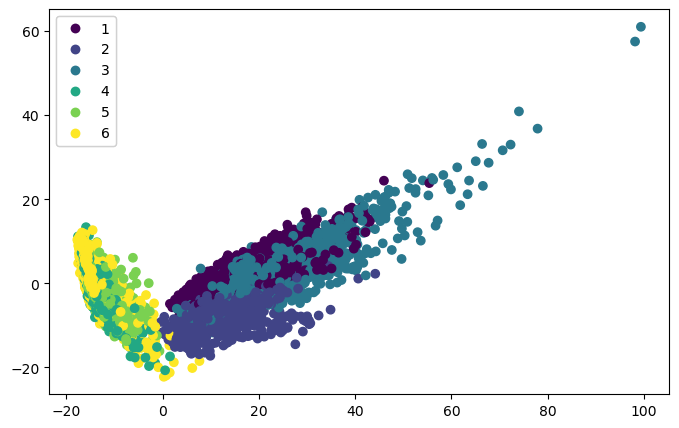

In [7]:
# your code here
z = pca.transform(X_transformed)
fig, ax = plt.subplots()
scatter = ax.scatter(z[:,0], z[:,1],c = y.values)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left")
ax.add_artist(legend1)

### Задание 4 [1 балл] <a id="task3_4"></a>


Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов). 

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

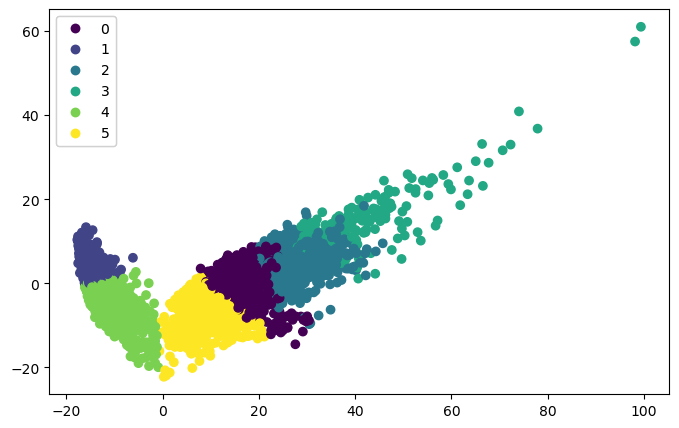

In [8]:
# your code here
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
clusters = km.fit_predict(z)
fig, ax = plt.subplots()
scatter = ax.scatter(z[:,0], z[:,1],c = clusters)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left")
ax.add_artist(legend1)

### Задание 5 [2 балла] <a id="task3_5"></a>


Сделайте кластеризацию данных методом DBSCAN. Подберите гипераметры `eps` и `min_samples` максимизируя метрику `silhouette_score`. Обучайте модель на данных со сниженной за счет PCA размерностью. Ваша цель получить модель с `silhouette_score` 0.47 или больше.

Сравните лучшую модель c k-means в терминать `silhouette_score`.

In [9]:
# YOUR CODE HERE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

ss = []
for eps1 in range(10,30):
    dbscan = DBSCAN(eps = eps1, min_samples=10)
    clusters1 = dbscan.fit_predict(z)
    print(np.unique(dbscan.labels_))
    ss.append(silhouette_score(z, clusters1))
    print('Eps = {}, Max silhouette score = {}'.format(eps1, silhouette_score(z, clusters1)))

[-1  0  1  2  3  4  5  6  7  8]
Eps = 10, Max silhouette score = 0.07482858621321191
[-1  0  1  2  3  4  5  6  7  8  9]
Eps = 11, Max silhouette score = 0.14844859139388722
[-1  0  1  2  3  4  5  6  7  8]
Eps = 12, Max silhouette score = 0.19038272488846028
[-1  0  1  2  3  4  5]
Eps = 13, Max silhouette score = 0.13906611668893676
[-1  0  1  2]
Eps = 14, Max silhouette score = 0.27242864102620873
[-1  0  1]
Eps = 15, Max silhouette score = 0.3185466365003075
[-1  0  1]
Eps = 16, Max silhouette score = 0.32508035424366394
[-1  0]
Eps = 17, Max silhouette score = 0.42291404071768207
[-1  0]
Eps = 18, Max silhouette score = 0.44885614611269964
[-1  0]
Eps = 19, Max silhouette score = 0.4757831646218055
[-1  0]
Eps = 20, Max silhouette score = 0.4931054468186877
[-1  0]
Eps = 21, Max silhouette score = 0.5147595159301328
[-1  0]
Eps = 22, Max silhouette score = 0.5332707696001574
[-1  0]
Eps = 23, Max silhouette score = 0.545239193925528
[-1  0]
Eps = 24, Max silhouette score = 0.57141977

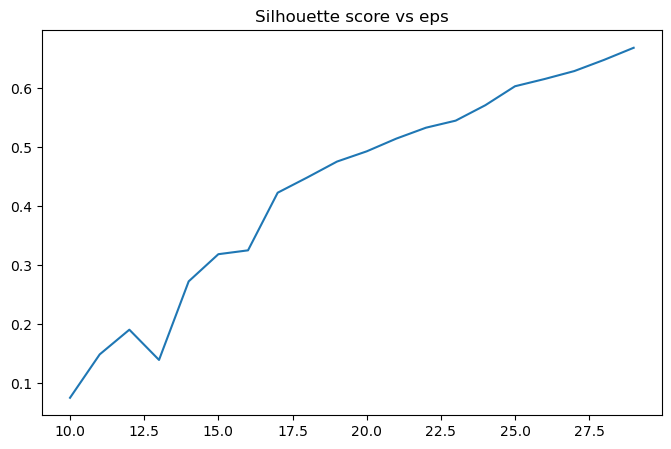

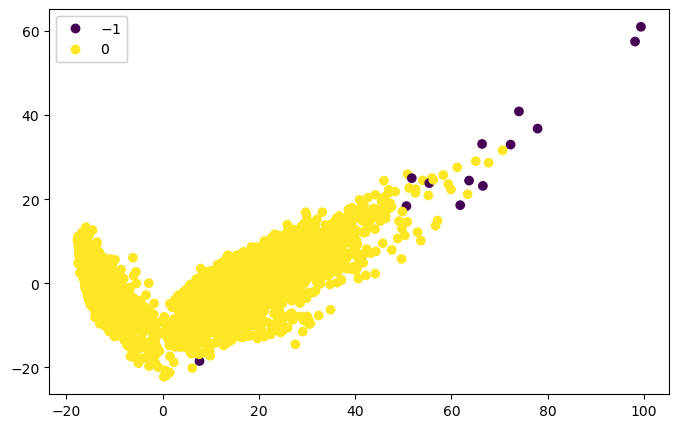

In [10]:
# YOUR CODE HERE: score for the best DBSCAN MODEL
plt.plot(range(10,30), ss)
plt.title('Silhouette score vs eps')
plt.savefig('SS.jpg')

fig, ax = plt.subplots()
scatter = ax.scatter(z[:,0], z[:,1],c = clusters1)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left")
ax.add_artist(legend1)

In [11]:
# YOUR CODE HERE: score for the  k-means MODEL
silhouette_score(z, clusters)

0.12782018546261137